<a href="https://colab.research.google.com/github/MrTheLuke/cpo_lab/blob/main/CPO_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

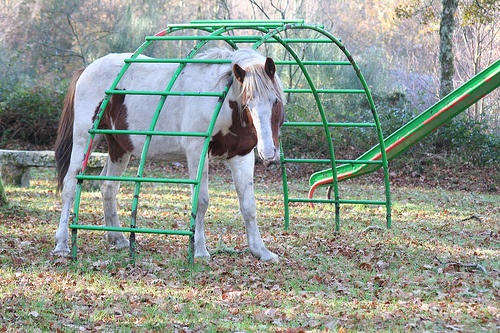

['/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//6.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//3.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//4.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//9.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//8.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//24.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//23.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//7.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//13.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//14.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//16.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//15.jpg', '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab0

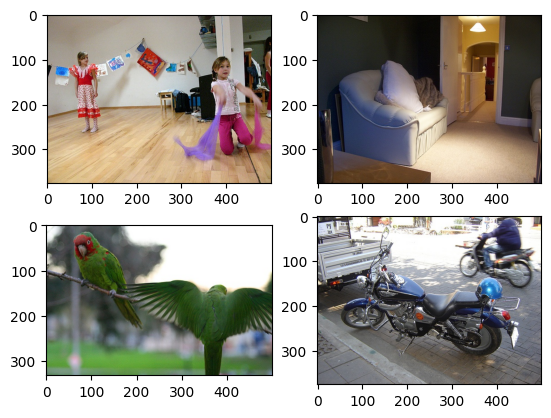

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir

import cv2

from google.colab.patches import cv2_imshow
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat/1.jpg')
cv2_imshow(image1)


# format png
new_image_path = '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/result.png'
cv2.imwrite(new_image_path, image1)

search_jpg = lambda a, b: [a + '/'+ f for f in listdir(a) if f.endswith(b)]
fextension = '.jpg'
mypath = '/content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat/'
myfiles = search_jpg(mypath, fextension)
print(myfiles)

plt.figure()
for i in range(0, 4):
  plt.subplot(2, 2, i+1)
  im_bgr = cv2.imread(myfiles[i])
  im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(im_rgb)
plt.show()

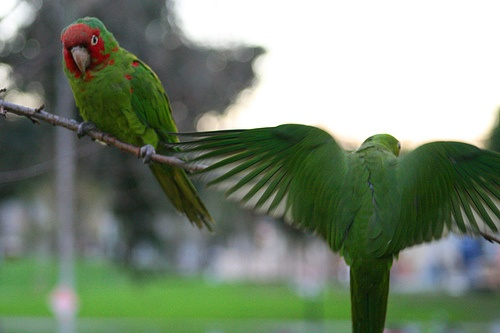

Rozdzielczość obrazu: (333, 500, 3)
Rozdzielczość obrazu: (83, 125, 3)
Rozdzielczość obrazu: (333, 500, 3)


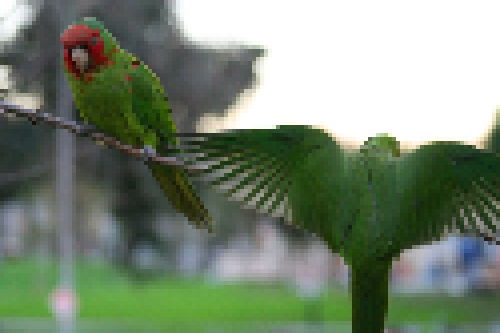

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread(myfiles[2])
cv2_imshow(image)
print(f'Rozdzielczość obrazu: {image.shape}')
# Przygotowania nowego rozmiaru obrazu, który wynosi 25% oryginalnego rozmiaru
dim = (int(image.shape[1] * 0.25), int(image.shape[0] * 0.25))
# Zmiana rozmiaru obrazu
image_small = cv2.resize(image, dim)
# Alternatywnie możemy zmniejszyć obraz stosując bezpośrednio współczynnik propocji
image_small = cv2.resize(image, None, fx=0.25, fy=0.25)
print(f'Rozdzielczość obrazu: {image_small.shape}')
image_big = cv2.resize(image_small, (image.shape[1],
image.shape[0]),
interpolation = cv2.INTER_NEAREST)
print(f'Rozdzielczość obrazu: {image_big.shape}')
cv2_imshow(image_big)

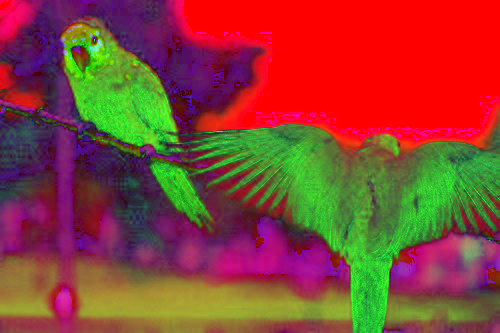

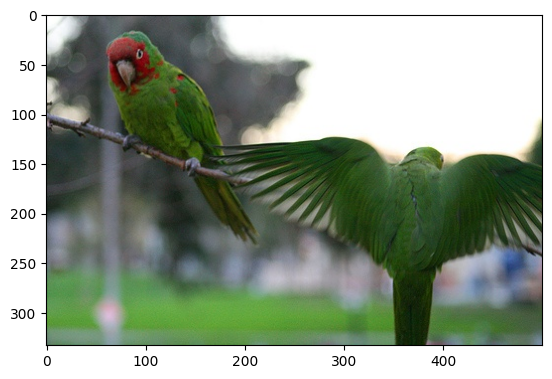

In [ ]:
import matplotlib.pyplot as plt
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(image_hsv)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.figure()
plt.imshow(image_rgb)
plt.show()

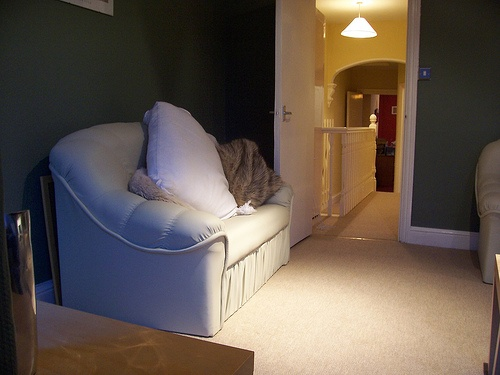

<Figure size 640x480 with 0 Axes>

(375, 500) 255 2 106.574912 uint8


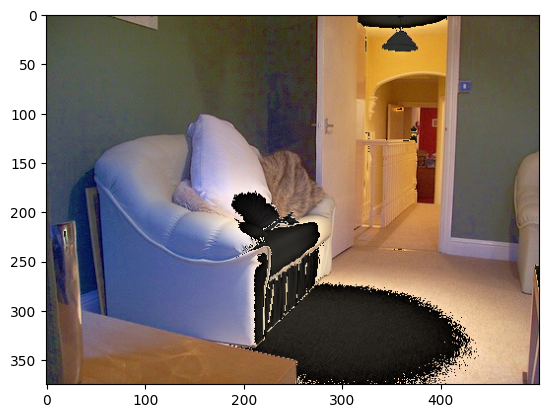

In [ ]:
image = cv2.imread(myfiles[1])
plt.figure()
cv2_imshow(image)
plt.show()
# Konwersja obrazu z BGR do HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Podział składowych obrazu HSV na 3 obrazu reprezentujące poszcególne składowe
h, s, v = cv2.split(image_hsv)
print(s.shape, np.max(v), np.min(v), np.mean(v), v.dtype)
# Operacje punktowe- rozjaśnienie obrazu przez dodanie 50 do każego piksela składowej V
v = np.round(v + 50)
v[v>255] = 255
v = np.uint8(v) # wymaga uint8
# Złączenie 3 obrazów w skaliszarości w obrazu zapisany w przestrzeni HSV
new_hsv = cv2.merge([h,s,v])
# Konwersja obrazu z HSV do RGB
image_rgb = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2RGB)
plt.figure()
plt.imshow(image_rgb)
plt.show()

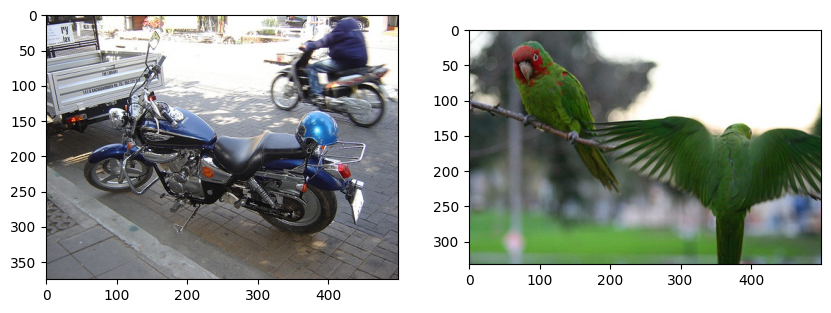

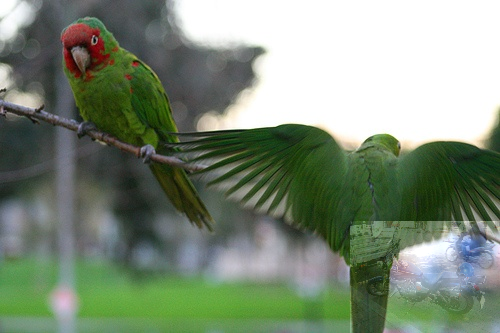

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
logo = cv2.imread(myfiles[3])
image = cv2.imread(myfiles[2])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# Dopasowanie rozamiu obrazu z logiem
logo = cv2.resize(logo, None, fx=0.3, fy=0.3)
# Określenie współrzędnych miejsca dodania loga
h_logo, w_logo, _ = logo.shape
h_image, w_image, _ = image.shape
bottom_y = h_image- h_logo
top_y = h_image
right_x = w_image
left_x = w_image- w_logo
roi = image[bottom_y:top_y, left_x:right_x]
# Dodanie loga do orygnalnego obrazu z wspołczynnikiem 0,3
result = cv2.addWeighted(roi, 1, logo, 0.3, 0)
image[bottom_y:top_y, left_x:right_x] = result
cv2_imshow(image)

Zad 1


Obraz: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5
  Format: JPEG
    Jakość: 30% | Rozmiar: 14.64 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_JPEG_30.jpg
    Jakość: 60% | Rozmiar: 23.52 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_JPEG_60.jpg
    Jakość: 90% | Rozmiar: 63.22 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_JPEG_90.jpg
  Format: PNG
    Jakość: 30% | Rozmiar: 336.79 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_PNG_30.png
    Jakość: 60% | Rozmiar: 341.90 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_PNG_60.png
    Jakość: 90% | Rozmiar: 550.63 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_PNG_90.png
  Format: WebP
    Jakość: 30% | Rozmiar: 11.76 KB | Plik: /content/drive/MyDrive/Colab Notebooks/baza_obrazow_lab02/Nat//5_WebP_30.webp
    Jakość: 60% | Rozmiar: 19.21 KB

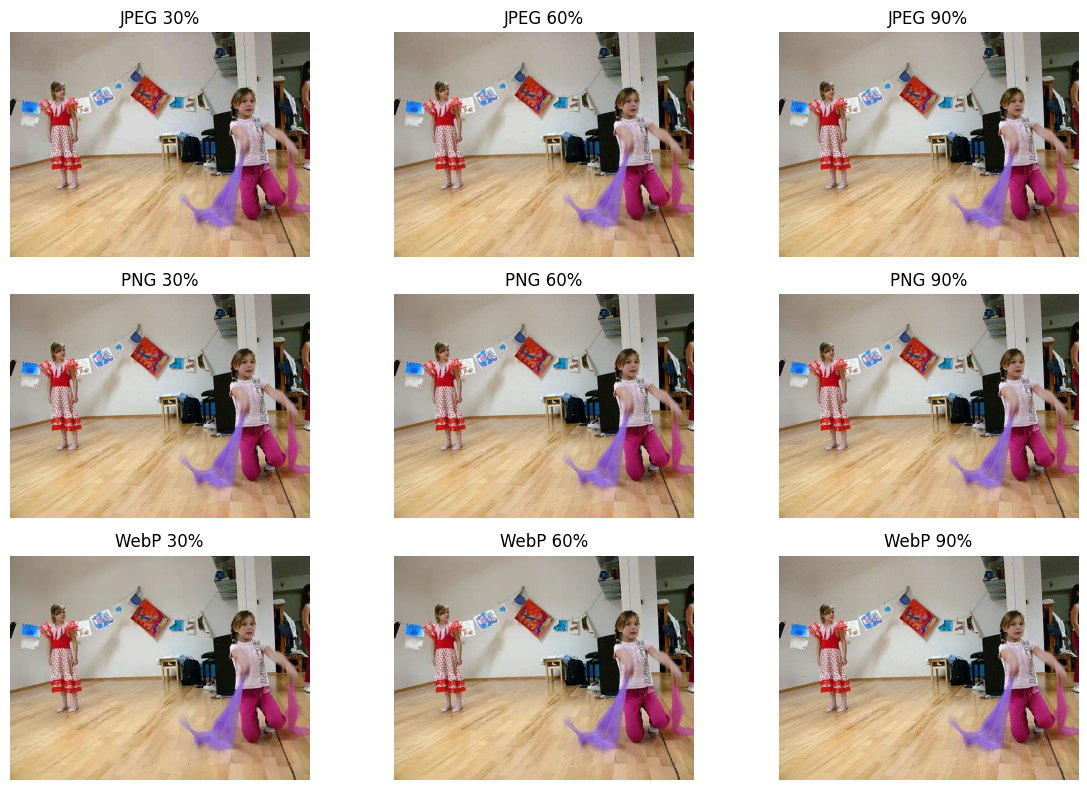

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Funkcja pomocnicza do zapisu i pomiaru rozmiaru pliku
def compress_and_measure(image, filename_base, format, quality):
    filename = f"{filename_base}_{format}_{quality}.{'jpg' if format=='JPEG' else 'png' if format=='PNG' else 'webp'}"
    if format == 'JPEG':
        cv2.imwrite(filename, image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    elif format == 'PNG':
        # PNG: 0 (bez kompresji) - 9 (największa kompresja)
        compression_level = int((9 * (100 - quality)) / 100)
        cv2.imwrite(filename, image, [int(cv2.IMWRITE_PNG_COMPRESSION), compression_level])
    elif format == 'WebP':
        cv2.imwrite(filename, image, [int(cv2.IMWRITE_WEBP_QUALITY), quality])

    size = os.path.getsize(filename) / 1024  # w KB
    return filename, size

# Wczytanie obrazów
image_paths = myfiles[:2]  # pierwsze dwa obrazy myfiles
images = []

for path in image_paths:
    # sprawdzenie czy plik istnieje i jest czytany
    img = cv2.imread(path)
    if img is not None:  # Sprawdzenie załadowania
        images.append((path, img))
    else:
        print(f"Nie można znaleźć ścieżki: {path}")

# Parametry kompresji
formats = ['JPEG', 'PNG', 'WebP']
qualities = [30, 60, 90]

# Przechowywanie wyników
results = {}

for img_name, img in images:
    base_name = os.path.splitext(img_name)[0]
    results[base_name] = {}
    for fmt in formats:
        results[base_name][fmt] = {}
        for q in qualities:
            file_out, size = compress_and_measure(img, base_name, fmt, q)
            results[base_name][fmt][q] = {
                'file': file_out,
                'size_kb': size
            }

# Wyświetlanie wyników
for img_name in results:
    print(f"\nObraz: {img_name}")
    for fmt in results[img_name]:
        print(f"  Format: {fmt}")
        for q in results[img_name][fmt]:
            info = results[img_name][fmt][q]
            print(f"    Jakość: {q}% | Rozmiar: {info['size_kb']:.2f} KB | Plik: {info['file']}")

# Opcjonalne wyświetlenie kilku zapisanych obrazów dla porównania
# Check if there are images to display before plotting
if images:
    fig, axs = plt.subplots(len(formats), len(qualities), figsize=(12, 8))
    for i, fmt in enumerate(formats):
        for j, q in enumerate(qualities):
            # Updated to use images[0][0] instead of images[0].split('.')[0]
            # This retrieves the original image path from the tuple
            file_path = results[os.path.splitext(images[0][0])[0]][fmt][q]['file']
            img_disp = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
            axs[i, j].imshow(img_disp)
            axs[i, j].set_title(f"{fmt} {q}%")
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images were loaded, so the comparison plot cannot be displayed.")